# PMF, CDF, Joint Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Parsa Alizadeh malafe

*SID:* 810101572

The objective of this notebook is to understand the concepts of PMF and CDF and joint distribution.

In [1]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Parameters

In [2]:
random.seed(572)
num_counters = 1
arrival_rate = 5  # customers per minute
service_rate = 6  # customers per minute
simulation_time = 10000  # minutes

## Simulation

In [4]:
def simulate_queue_system():
    """
    Simulates a queue system with customers arriving at service counters, waiting for service, and being served.

    This function defines the customer behavior and the setup of the simulation environment. It initializes the simulation environment, sets up the service counters, and continuously generates customer arrivals based on specified arrival and service rates. The function runs the simulation until the specified simulation time and returns the recorded wait times, arrival times, and service times of the customers.

    Returns:
        tuple: A tuple containing three lists - wait_times, arrival_times, and service_times, which record the respective times for each customer in the simulation.
    """

    def customer(
        env: simpy.Environment,
        name: str,
        counter: simpy.Resource,
        service_time: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Simulates a customer arriving at a service counter, waiting for service, and then being served.

        Args:
            env (simpy.Environment): The simulation environment.
            name (str): The name of the customer.
            counter (simpy.Resource): The service counter resource.
            service_time (float): The time it takes to serve the customer.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Process: The process of the customer being served.
        """
        arrival_time = env.now
        arrival_times.append(arrival_time)
        with counter.request() as req:
            yield req
            yield env.timeout(service_time)
            service_times.append(service_time)
            wait_time = env.now - arrival_time
            wait_times.append(wait_time)

    def setup(
        env: simpy.Environment,
        num_counters: int,
        arrival_rate: float,
        service_rate: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Sets up the simulation environment with a specified number of service counters and customer arrival and service rates.

        Args:
            env (simpy.Environment): The simulation environment.
            num_counters (int): The number of service counters available.
            arrival_rate (float): The rate at which customers arrive.
            service_rate (float): The rate at which customers are served.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Timeout: The timeout event for the next customer arrival.
        """
        counter = simpy.Resource(env, num_counters)
        while True:
            yield env.timeout(np.random.exponential(1 / arrival_rate))
            service_time = np.random.exponential(1 / service_rate)
            env.process(
                customer(
                    env,
                    "Customer",
                    counter,
                    service_time,
                    wait_times,
                    arrival_times,
                    service_times,
                )
            )

    while True:
        env = simpy.Environment()
        wait_times = []
        arrival_times = []
        service_times = []
        env.process(
            setup(
                env,
                num_counters,
                arrival_rate,
                service_rate,
                wait_times,
                arrival_times,
                service_times,
            )
        )
        env.run(until=simulation_time)

        if len(wait_times) == len(arrival_times) == len(service_times):
            return wait_times, arrival_times, service_times
        
wait_times, arrival_times, service_times = simulate_queue_system()

## Plot the RVs Distributions

Text(0.5, 1.0, 'Wait Times (No KDE)')

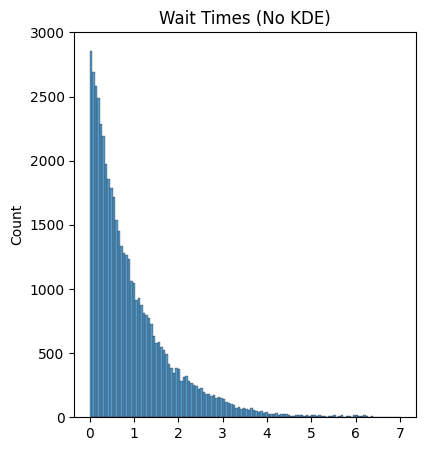

In [7]:
plt.figure(figsize=(15, 5))
# Distribution of Arrival Times
plt.subplot(131)
sns.histplot(wait_times, kde=False)
plt.title('Wait Times (No KDE)')

Text(0.5, 1.0, 'Wait Times (KDE, bw_adjust=0.5)')

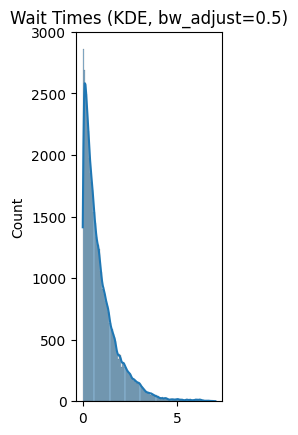

In [8]:
######################  TODO  ########################
# Distribution of Waiting Times
plt.subplot(132)
sns.histplot(wait_times, kde=True, kde_kws={'bw_adjust': 0.5})
plt.title('Wait Times (KDE, bw_adjust=0.5)')

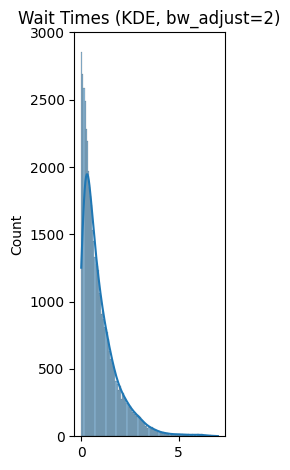

In [10]:
######################  TODO  ########################
# Distribution of Service Times
plt.subplot(133)
sns.histplot(wait_times, kde=True, kde_kws={'bw_adjust': 2})
plt.title('Wait Times (KDE, bw_adjust=2)')
plt.tight_layout()
plt.show()

KDE is an statistical techniqe for evaluation of PDF. It helps us to visualize the data smoothly. 
Main aplications of KDE:
1. smoothing the histogram
2. Removes sharp angles and discontinuities in histograms
3. Provides a more continuous view of the data compared to traditional bar histograms
The bw_adjust parameter controls the bandwidth. The more smaller the value, the more detailed and sensitive the representation is.
 For example:
   1. bw_adjust = 0.5: Captures more local variations, shows detailed peaks and valleys.
   2. bw_adjust = 2: Creates a smoother, more generalized distribution curve.

## Plot the Joint Distributions

**Note:** Use `sns.jointplot` to plot the joint distributions

Text(0.5, 0.98, 'Joint Distribution: Arrival Times vs Service Times')

<Figure size 1000x500 with 0 Axes>

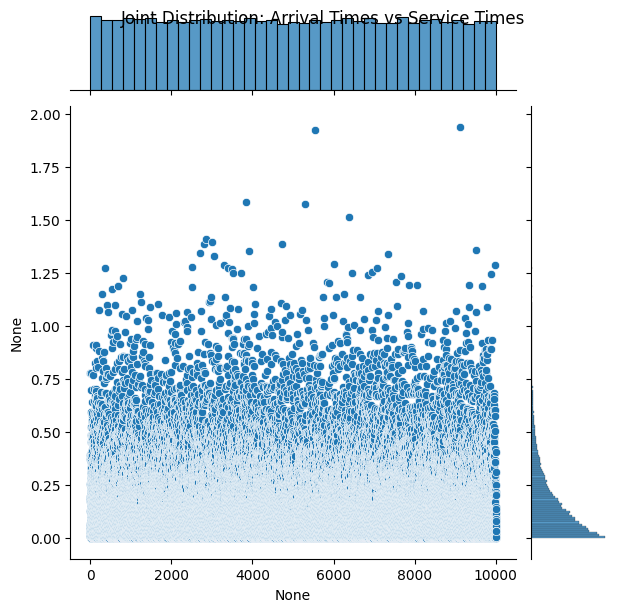

In [11]:
######################  TODO  ########################
# Joint Distribution of Arrival and Service Times
plt.figure(figsize=(10, 5))
sns.jointplot(x=arrival_times, y=service_times, kind='scatter')
plt.suptitle('Joint Distribution: Arrival Times vs Service Times')

In [12]:
######################  TODO  ########################
# Joint Distribution of Arrival and Service Times
plt.show()

## Analysis of Joint Distributions

No, we cannot conclude that wait_times and arrival_times have a correlation. There is no correlation between wait_times and arrival_times. The relationship is  statistically independent. Waiting time is more influenced by overall system conditions than specific arrival times.

## Scatter Plot and Correlation

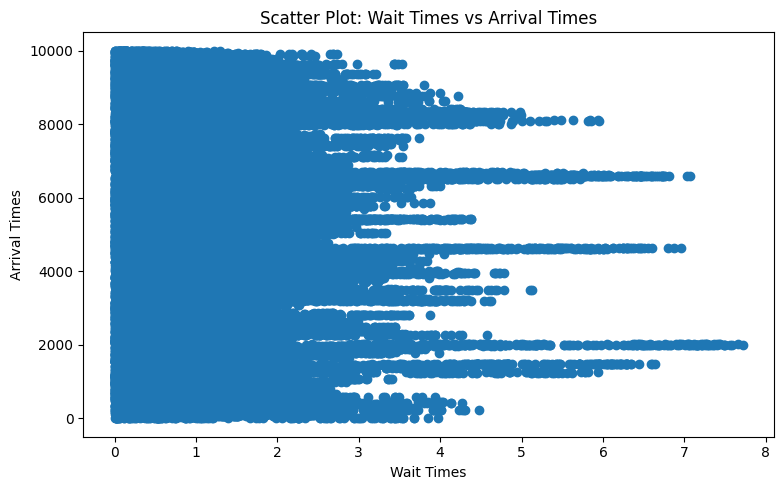

Correlation Coefficient: -0.030634000724657013


In [10]:
######################  TODO  ########################
# Scatter Plot of Arrival and Service Times
plt.figure(figsize=(15, 5))

plt.subplot(122)
plt.scatter(wait_times, arrival_times)
plt.title('Scatter Plot: Wait Times vs Arrival Times')
plt.xlabel('Wait Times')
plt.ylabel('Arrival Times')

plt.tight_layout()
plt.show()

correlation = np.corrcoef(wait_times, arrival_times)[0, 1]
print(f"Correlation Coefficient: {correlation}")


## Calculating `total_times`

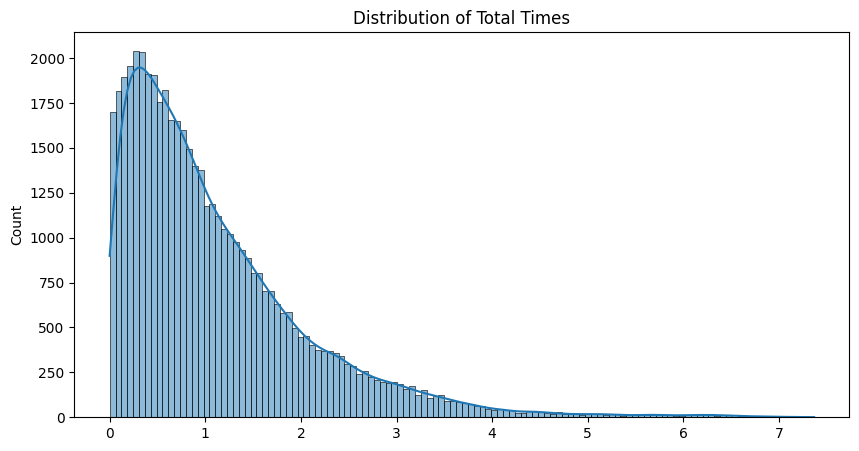

In [14]:
######################  TODO  ########################
# Distribution of Total Time Spent in the System
total_times = np.array(wait_times) + np.array(service_times)

plt.figure(figsize=(10, 5))
sns.histplot(total_times, kde=True)
plt.title('Distribution of Total Times')
plt.show()

The histogram of total_times typically shows a right-skewed distribution, which is characteristic of queuing systems. When you add two independent exponential distributions, the result is a hyperexponential. This naturally leads to a right-skewed distribution. 
Distribution Characteristics are Long right tail, Peak shifted to the left.
In reality it means that most customers spend short times in the system and some customers experience unusually long total times.

## Conditional Wait Times

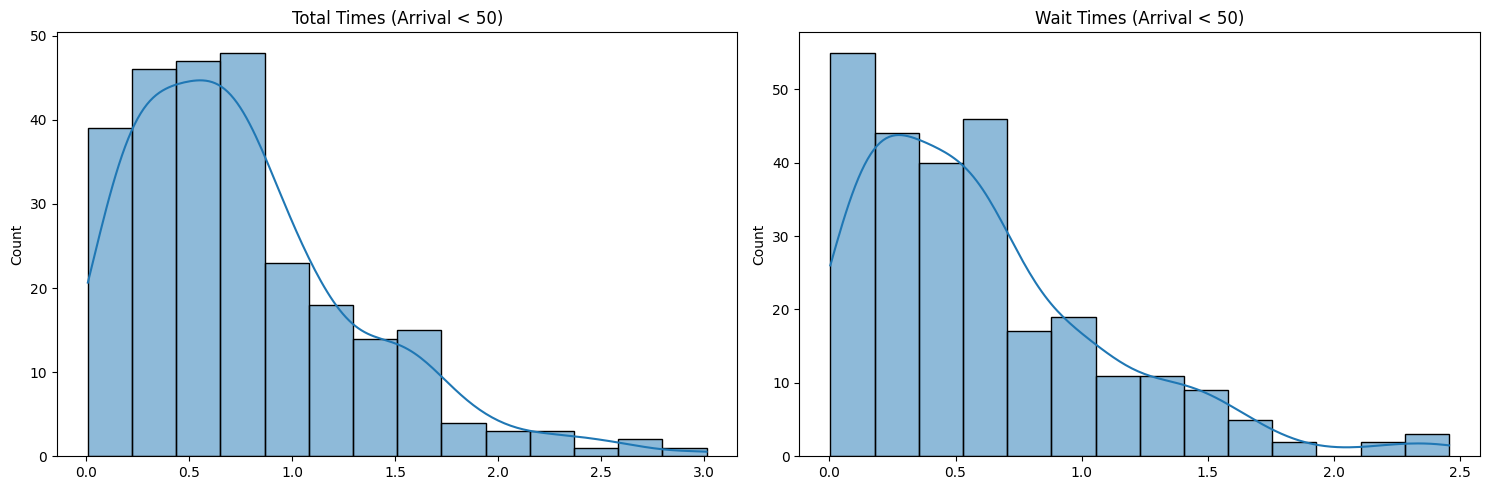

In [15]:
######################  TODO  ########################
# Conditional Distribution of Waiting Times (Arrival Time < 50)
mask = np.array(arrival_times) < 50
filtered_total_times = total_times[mask]
filtered_wait_times = np.array(wait_times)[mask]

plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.histplot(filtered_total_times, kde=True)
plt.title('Total Times (Arrival < 50)')

plt.subplot(122)
sns.histplot(filtered_wait_times, kde=True)
plt.title('Wait Times (Arrival < 50)')

plt.tight_layout()
plt.show()